# Clustering Methods

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import math as math

from sklearn.metrics.pairwise import haversine_distances

from sklearn.cluster import OPTICS

## Importing Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Undefined.csv to Undefined (1).csv


In [ ]:
import io

df = pd.read_csv(io.StringIO(uploaded['Undefined.csv'].decode('utf-8')))

In [ ]:
df

Unnamed: 0        Date  ... Tecto-setting                 region
0               0  1965-01-02  ...    Convergent     Philippine-Pacific
1               2  1965-01-05  ...    Convergent     Australian-Pacific
2               3  1965-01-08  ...     Divergent  SouthAmerican-African
3               4  1965-01-09  ...    Convergent    Philippine-Eurasian
4               7  1965-01-15  ...    Convergent     Australian-Pacific
...           ...         ...  ...           ...                    ...
12401       23207  2016-12-18  ...     Divergent          Nazca-Pacific
12402       23208  2016-12-18  ...    Convergent     Australian-Pacific
12403       23217  2016-12-21  ...    Convergent     Philippine-Pacific
12404       23218  2016-12-24  ...    Convergent     Australian-Pacific
12405       23228  2016-12-30  ...    Convergent    Philippine-Eurasian

[12406 rows x 15 columns]

In [ ]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

## Extraction + Conversion

In [ ]:
lat_lon = df[['Latitude', 'Longitude']]

In [ ]:
# convversion to radians needed for haversine distances
lat_lon_radians = np.radians(lat_lon)

## Distance Matrix Calculation

In [ ]:
distances = haversine_distances(lat_lon_radians, lat_lon_radians)

In [ ]:
distances

array([[0.        , 0.97988772, 2.43305073, ..., 0.03953655, 0.4488029 ,
        0.32322043],
       [0.97988772, 0.        , 1.68791397, ..., 1.00937258, 0.61145258,
        1.24936127],
       [2.43305073, 1.68791397, 0.        , ..., 2.47148971, 2.01826328,
        2.72704424],
       ...,
       [0.03953655, 1.00937258, 2.47148971, ..., 0.        , 0.48727627,
        0.28392019],
       [0.4488029 , 0.61145258, 2.01826328, ..., 0.48727627, 0.        ,
        0.77011781],
       [0.32322043, 1.24936127, 2.72704424, ..., 0.28392019, 0.77011781,
        0.        ]])

## Clustering Process

In [1]:
# DBSCAN with 'Optimization' through relevant literature stated in report

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
# 30 neighbours roughly - 2*dim of data from relevant literature stated in report

In [ ]:
neighbors = NearestNeighbors(n_neighbors=30)
neighbors_fit = neighbors.fit(lat_lon_radians)
distances, indices = neighbors_fit.kneighbors(lat_lon_radians)

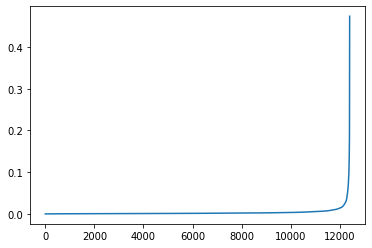

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

# need to zoom need to see epsilon value at the sharp increase

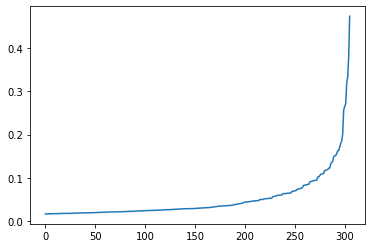

In [ ]:
plt.plot(distances[12100:])

In [ ]:
# therefore 'chosen' hyperparameters: min samples 30, epsilon 0.1

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
debscan = DBSCAN(eps = 0.1,min_samples = 30, metric = 'precomputed', n_jobs = -1)

In [ ]:
debscan.fit(distances)

DBSCAN(eps=0.1, metric='precomputed', min_samples=30, n_jobs=-1)

In [ ]:
A = pd.DataFrame(debscan.labels_) #collecting all cluster classifications, used to merge to full dataframe

In [ ]:
A

0
0      0
1      1
2      2
3      0
4      1
...   ..
12401  9
12402  1
12403  0
12404  1
12405  0

[12406 rows x 1 columns]

In [ ]:
A.value_counts()

 0     3967
 1     3904
 2      770
 3      675
 5      628
 7      587
 9      557
 4      380
-1      247
 8      125
 10     122
 15     113
 13      79
 12      69
 6       60
 14      55
 11      36
 16      32
dtype: int64

In [ ]:
clustered2 = pd.concat([df,A], axis = 1)

In [ ]:
clustered2

Date             Time  ...                 region  0
0      1965-01-02  0 days 13:44:18  ...     Philippine-Pacific  0
1      1965-01-05  0 days 18:05:58  ...     Australian-Pacific  1
2      1965-01-08  0 days 18:49:43  ...  SouthAmerican-African  2
3      1965-01-09  0 days 13:32:50  ...    Philippine-Eurasian  0
4      1965-01-15  0 days 23:17:42  ...     Australian-Pacific  1
...           ...              ...  ...                    ... ..
12401  2016-12-18  0 days 06:15:46  ...          Nazca-Pacific  9
12402  2016-12-18  0 days 06:39:42  ...     Australian-Pacific  1
12403  2016-12-21  0 days 16:43:57  ...     Philippine-Pacific  0
12404  2016-12-24  0 days 01:32:16  ...     Australian-Pacific  1
12405  2016-12-30  0 days 20:08:28  ...    Philippine-Eurasian  0

[12406 rows x 15 columns]

In [ ]:
# exporting for visualisation in tableau
clustered2.to_csv('clustered__DBSCAN_OPT.csv')
!cp clustered__DBSCAN_OPT.csv "drive/My Drive/"

In [ ]:
# considering default DBSCAN hyperparameters
debscan1 = DBSCAN(metric = 'precomputed', n_jobs = -1)

In [ ]:
debscan1.fit(distances)

DBSCAN(metric='precomputed', n_jobs=-1)

In [ ]:
B = pd.DataFrame(debscan1.labels_)

In [ ]:
B.value_counts()
# clearly a bad result with all points effectively assigned to a single cluster, using relevant literature in report, is primarily due to a large epsilon value

 0    12403
-1        3
dtype: int64

In [ ]:
# OPTICS using the same 'tuned' minimum number of samples

In [ ]:
optics_c = OPTICS(metric = 'precomputed', min_samples = 30, n_jobs = -1)

In [2]:
optics_c.fit(distances)

In [ ]:
optics_c.labels_

array([ 0, 38, -1, ..., -1, -1, -1])

In [ ]:
y = pd.DataFrame(optics_c.labels_)

In [ ]:
y = pd.read_csv('OPTICS_results.csv')

In [ ]:
# adding optics labels to dataframe
clustered = pd.concat([undefined,y], axis = 1)

In [ ]:
clustered

index        Date  ...                 region   0
0          0  1965-01-02  ...     Philippine-Pacific   0
1          2  1965-01-05  ...     Australian-Pacific  38
2          3  1965-01-08  ...  SouthAmerican-African  -1
3          4  1965-01-09  ...    Philippine-Eurasian  -1
4          7  1965-01-15  ...     Australian-Pacific  -1
...      ...         ...  ...                    ...  ..
12401  23207  2016-12-18  ...          Nazca-Pacific  -1
12402  23208  2016-12-18  ...     Australian-Pacific  -1
12403  23217  2016-12-21  ...     Philippine-Pacific  -1
12404  23218  2016-12-24  ...     Australian-Pacific  -1
12405  23228  2016-12-30  ...    Philippine-Eurasian  -1

[12406 rows x 16 columns]

In [ ]:
# exporting for visualisation in tableau
clustered.to_csv('clustered_OPTICS.csv')
!cp clustered_OPTICS.csv "drive/My Drive/"